# Assignment 3

In [2]:
!pip install wooldridge

In [3]:
# Script name: Assignment 3
# Purpose of script: Understand 'Population Regression Function' and Ordinary Least Squares Estimates
# Author: Minh-Thy Tyler
# Date Created: 
# 09/11/2022
# Notes: N/A
# ---------------------------

# Packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.optimize import minimize
from scipy.stats import linregress
import os
# Set up working directory
directory_path = '/Users/minh-thytyler/Desktop/2022-2023/ECON 320/HW/3' # use / instead of \ or use \ but insert r before (for instance: r'C:\your-directory-path')
os.chdir(directory_path)

Part I

In [4]:
#Perform a data generating process of y = B0 + B1*x+u from assignment 2

birthday = '08182001'
rng = np.random.RandomState(int(birthday))

beta0=9
beta1=8

x = rng.normal(loc=10,scale=1,size=1000000)
u = rng.normal(loc=0,scale=1,size=1000000)
y = beta0 +beta1*x +u

#data variable is in a data frame

data ={"x": x, "u":u,"y":y}
datas = pd.DataFrame(data)

In [5]:
#Taking a sample of 1000 observations from population data
sample = datas.sample(n=1000, replace=False, random_state=rng)

In [6]:
# ingredients to the OLS formulas:
#calculating b1 and b0 using functions sum()
sumxy = np.sum((sample.x-np.mean(sample.x))*(sample.y - np.mean(sample.y)))
sumx2 = np.sum((sample.x-np.mean(sample.x))**2)
sumy2 = np.sum((sample.y-np.mean(sample.y))**2)
x_bar = np.mean(sample.x)
y_bar = np.mean(sample.y)

# manual calculation of OLS coefficients:
b1 = sumxy/sumx2
b0 = y_bar - b1 * x_bar

print(f'b0: {b0}\n')
print(f'b1: {b1}\n')

# ingredients to the OLS formulas:
# calculating b1 and b0 using functions var()

cov_xy = np.cov(sample.x, sample.y)[1,0]  # access 2. row and 1. column of covariance matrix
var_x = np.var(sample.x, ddof=1)

# manual calculation of OLS coefficients:
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar

print(f'b0: {b0}\n')
print(f'b1: {b1}\n')


b0: 8.968436930020019

b1: 8.002289467888227

b0: 8.968436930020019

b1: 8.002289467888227



Part II

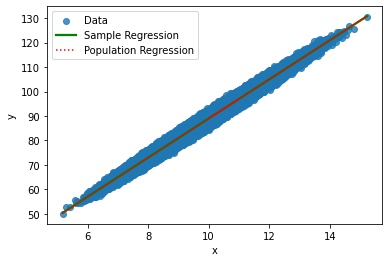

In [37]:
#Regression graph learned in class w/population reference
sns.regplot(x = "x",y = "y", data = datas, line_kws={'color':'green'}, ci=None);
#manually calculating predicted line
plt.plot(datas["x"], b0+b1*datas["x"], ':r');
plt.legend(["Data",'Sample Regression',"Population Regression"],loc='upper left');

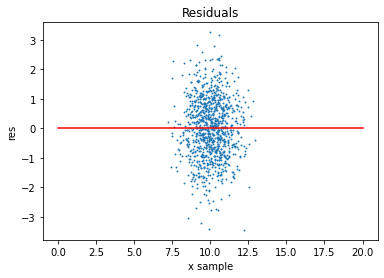

In [38]:
#Residual graph
#Calculating predicted line
yline = b0 + b1*sample.x
#Calculating residuals using formula
res = sample.y - yline

plt.scatter(sample.x, res, s=0.8)
plt.plot([0,20], [0,0], '-r')
plt.xlabel("x sample")
plt.ylabel("res")
plt.title("Residuals")
plt.show()